Eileen Zhang 2020/08/01

In [1]:
import numpy as np
import os
import time

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# cifar10 查看

In [2]:
from tensorflow import keras
from keras.datasets import cifar10

In [3]:
(x_train, y_train_cats), (x_test, y_test_cats) = cifar10.load_data()

In [4]:
x_train = x_train/255.
x_test = x_test/255.

In [5]:
type(x_train),x_train.shape

(numpy.ndarray, (50000, 32, 32, 3))

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

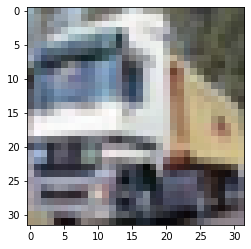

In [7]:
plt.imshow(x_train[1])

0 airplane 										
1 automobile 										
2 bird 										
3 cat 										
4 deer 										
5 dog 										
6 frog 										
7 horse 										
8 ship 										
9 truck

In [5]:
def mlp(units, dropout = 0.2,output_layer=True):
    layers = []
    if(output_layer):
        last = units[-1]
        units = units[:-1]
    for u in units:
        layers.append(keras.layers.BatchNormalization())
        layers.append(keras.layers.Dense(u, activation='relu'))
        layers.append(keras.layers.Dropout(dropout))
    if(output_layer):
        layers.append(keras.layers.Dense(last, activation=keras.activations.softmax))
    return layers

In [6]:
import tensorflow as tf

# 纯CNN

In [51]:
layers = []
layers.append(keras.layers.Conv2D(32, 5,input_shape = [32, 32,3]))
layers.append(keras.layers.MaxPool2D(2))
layers.append(keras.layers.Conv2D(128, 4,input_shape = [32, 32,3]))
layers.append(keras.layers.MaxPool2D(2))
layers.append(keras.layers.Conv2D(16, 2,input_shape = [32, 32,3]))
layers.append(keras.layers.MaxPool2D(2))
layers.append(keras.layers.Flatten())
layers += mlp([300,20,10])

In [52]:
model0 = keras.models.Sequential(layers)

In [53]:
model0.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
%%time
model0.fit(x_train, y_train_cats, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.7704 - accuracy: 0.3655
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4488 - accuracy: 0.4825
Epoch 3/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.3445 - accuracy: 0.5220
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.2722 - accuracy: 0.5472
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2167 - accuracy: 0.5725
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1736 - accuracy: 0.5879
Epoch 7/10
1563/1563 [==============================] - ETA: 0s - loss: 1.1428 - accuracy: 0.60 - 71s 46ms/step - loss: 1.1427 - accuracy: 0.6003
Epoch 8/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1178 - accuracy: 0.6089
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0908 - accuracy: 0.6183
Epoch 10/10
1563/1563 

In [55]:
model0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       65664     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 16)          8208      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

## 第一层 Feature Map 查看

In [19]:
inputs = keras.Input(shape=[32,32,3])

In [15]:
from keras.models import Model

In [20]:
model_fm = Model(inputs = model0.input, outputs = model0.get_layer('conv2d_1').output)

In [22]:
conv2d_1 = model_fm(np.expand_dims(x_train[1],0))

In [23]:
conv2d_1.shape

TensorShape([1, 29, 29, 32])

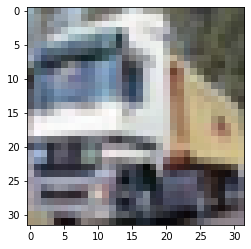

In [80]:
plt.imshow(x_train[1])

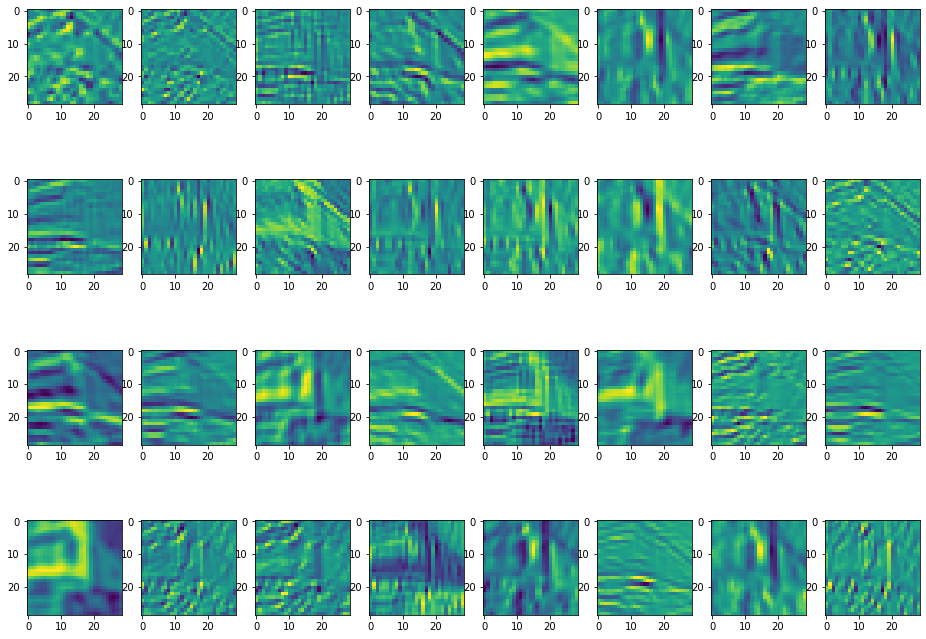

In [50]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_1[...,i]) * 255)
plt.show()

In [ ]:
keras.layers.MaxPool2D(128, 4,input_shape = [32, 32,3])

## 查看两个Feature map add后效果

**总结**:第一层feature map 和第二层feature map add后,有的add后图像在第一次feature map基础上画重点

In [74]:
layers = []
layers.append(keras.layers.Conv2D(32, 5, input_shape = [32, 32,3], padding="same"))
layers.append(keras.layers.Conv2D(128, 4, padding="same"))
layers.append(keras.layers.Conv2D(16, 2, padding="same"))
layers.append(keras.layers.MaxPool2D(2))
layers.append(keras.layers.Flatten())
layers += mlp([300,20,10])

In [75]:
model1 = keras.models.Sequential(layers)
model1.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [76]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)       65664     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 16)        8208      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 4096)              16384     
_________________________________________________________________
dense_9 (Dense)              (None, 300)              

In [77]:
%%time
model1.fit(x_train, y_train_cats, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 781s 500ms/step - loss: 1.7197 - accuracy: 0.3867
Epoch 2/10
1563/1563 [==============================] - 516s 330ms/step - loss: 1.3096 - accuracy: 0.5363
Epoch 3/10
1563/1563 [==============================] - 478s 306ms/step - loss: 1.1280 - accuracy: 0.6043
Epoch 4/10
1563/1563 [==============================] - 595s 380ms/step - loss: 1.0299 - accuracy: 0.6391
Epoch 5/10
1563/1563 [==============================] - 475s 304ms/step - loss: 0.9510 - accuracy: 0.6640
Epoch 6/10
1563/1563 [==============================] - 476s 305ms/step - loss: 0.9048 - accuracy: 0.6820
Epoch 7/10
1563/1563 [==============================] - 475s 304ms/step - loss: 0.8444 - accuracy: 0.7029
Epoch 8/10
1563/1563 [==============================] - 472s 302ms/step - loss: 0.7943 - accuracy: 0.7198
Epoch 9/10
1563/1563 [==============================] - 474s 303ms/step - loss: 0.7659 - accuracy: 0.7295
Epoch 10/10
1563/1563 [=======================

In [81]:
model_con1 = Model(inputs = model1.input, outputs = model1.get_layer('conv2d_8').output)
model_con2 = Model(inputs = model1.input, outputs = model1.get_layer('conv2d_9').output)
model_con3 = Model(inputs = model1.input, outputs = model1.get_layer('conv2d_10').output)

In [82]:
conv2d_1 = model_con1(np.expand_dims(x_train[1],0))
conv2d_2 = model_con2(np.expand_dims(x_train[1],0))
conv2d_3 = model_con3(np.expand_dims(x_train[1],0))

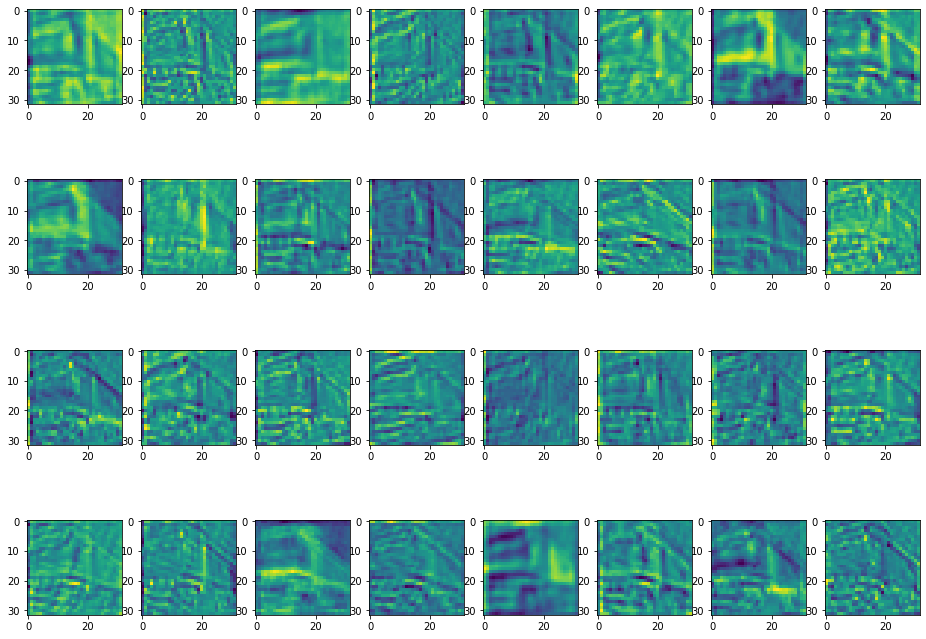

In [83]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_1[...,i]) * 255)
plt.show()

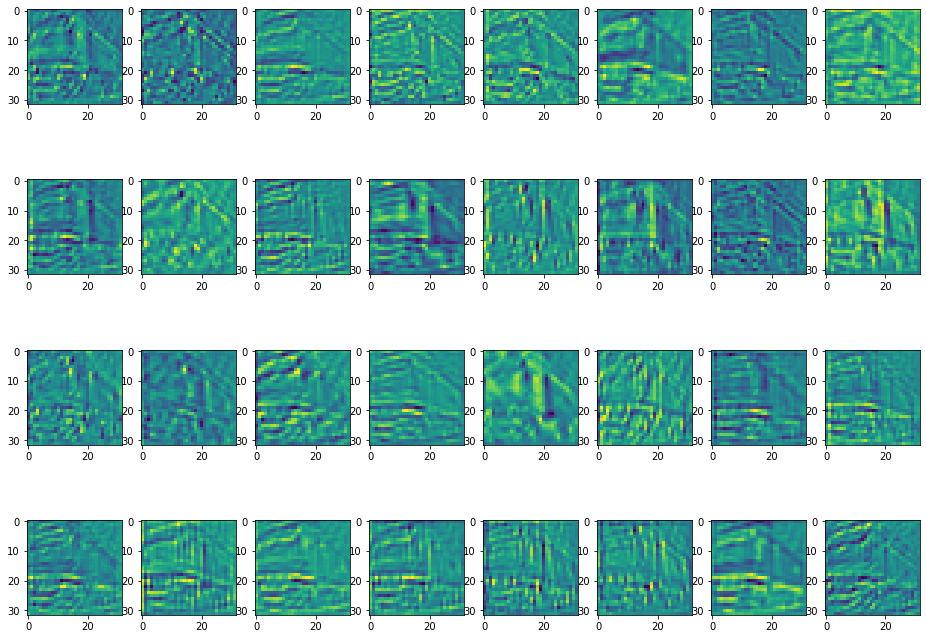

In [84]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_2[...,i]) * 255)
plt.show()

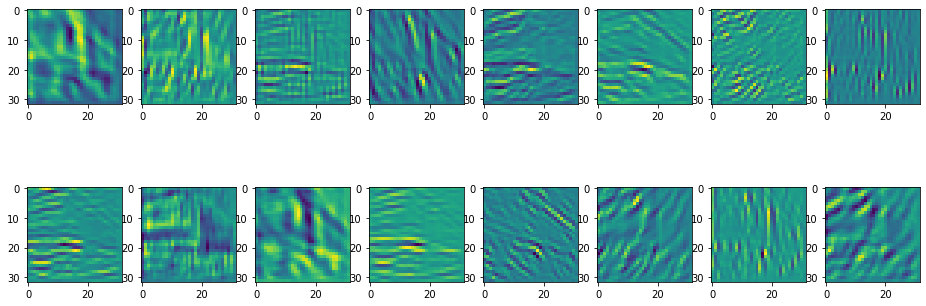

In [89]:
plt.figure(figsize = (8*2, 2*3))
for i in range(16):
    plt.subplot(2, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_3[...,i]) * 255)
plt.show()

In [94]:
conv2d_1_3 = conv2d_1[...,0:16] + conv2d_3

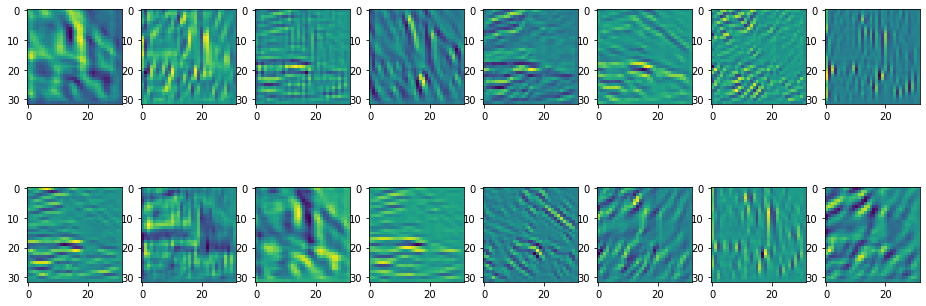

In [95]:
plt.figure(figsize = (8*2, 2*3))
for i in range(16):
    plt.subplot(2, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_1_3[...,i]) * 255)
plt.show()

# cnn加入激活函数relu

**总结**:个人认为抽象能力,关键点捕捉的更好

In [97]:
layers = []
layers.append(keras.layers.Conv2D(32, 5, input_shape = [32, 32,3], padding="same", activation='relu'))
layers.append(keras.layers.Conv2D(128, 4, padding="same",activation='relu'))
layers.append(keras.layers.Conv2D(16, 2, padding="same",activation='relu'))
layers.append(keras.layers.MaxPool2D(2))
layers.append(keras.layers.Flatten())
layers += mlp([300,20,10])

In [98]:
model2 = keras.models.Sequential(layers)
model2.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [99]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 128)       65664     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 16)        8208      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 4096)              16384     
_________________________________________________________________
dense_15 (Dense)             (None, 300)              

In [100]:
%%time
model2.fit(x_train, y_train_cats, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 537s 343ms/step - loss: 1.6922 - accuracy: 0.4012
Epoch 2/10
1563/1563 [==============================] - 563s 360ms/step - loss: 1.3232 - accuracy: 0.5315
Epoch 3/10
1563/1563 [==============================] - 741s 474ms/step - loss: 1.1549 - accuracy: 0.5937
Epoch 4/10
1563/1563 [==============================] - 514s 329ms/step - loss: 1.0452 - accuracy: 0.6365
Epoch 5/10
1563/1563 [==============================] - 538s 344ms/step - loss: 0.9797 - accuracy: 0.6582
Epoch 6/10
1563/1563 [==============================] - 493s 315ms/step - loss: 0.9131 - accuracy: 0.6811
Epoch 7/10
1563/1563 [==============================] - 485s 310ms/step - loss: 0.8625 - accuracy: 0.6990
Epoch 8/10
1563/1563 [==============================] - 486s 311ms/step - loss: 0.8243 - accuracy: 0.7140
Epoch 9/10
1563/1563 [==============================] - 477s 305ms/step - loss: 0.7771 - accuracy: 0.7275
Epoch 10/10
1563/1563 [=======================

In [101]:
model_con1 = Model(inputs = model2.input, outputs = model2.get_layer('conv2d_14').output)
model_con2 = Model(inputs = model2.input, outputs = model2.get_layer('conv2d_15').output)
model_con3 = Model(inputs = model2.input, outputs = model2.get_layer('conv2d_16').output)
conv2d_1 = model_con1(np.expand_dims(x_train[1],0))
conv2d_2 = model_con2(np.expand_dims(x_train[1],0))
conv2d_3 = model_con3(np.expand_dims(x_train[1],0))

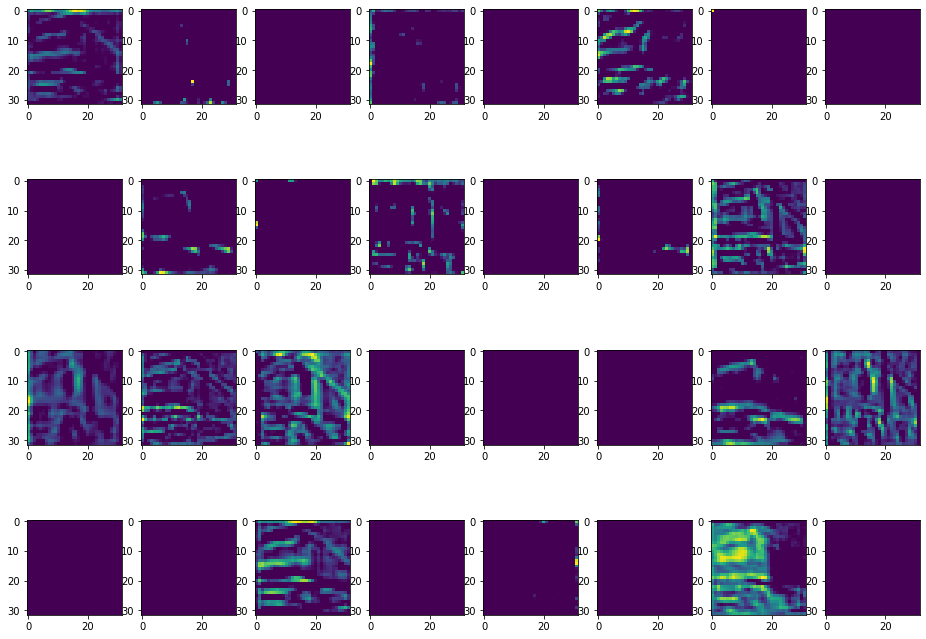

In [102]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_1[...,i]) * 255)
plt.show()

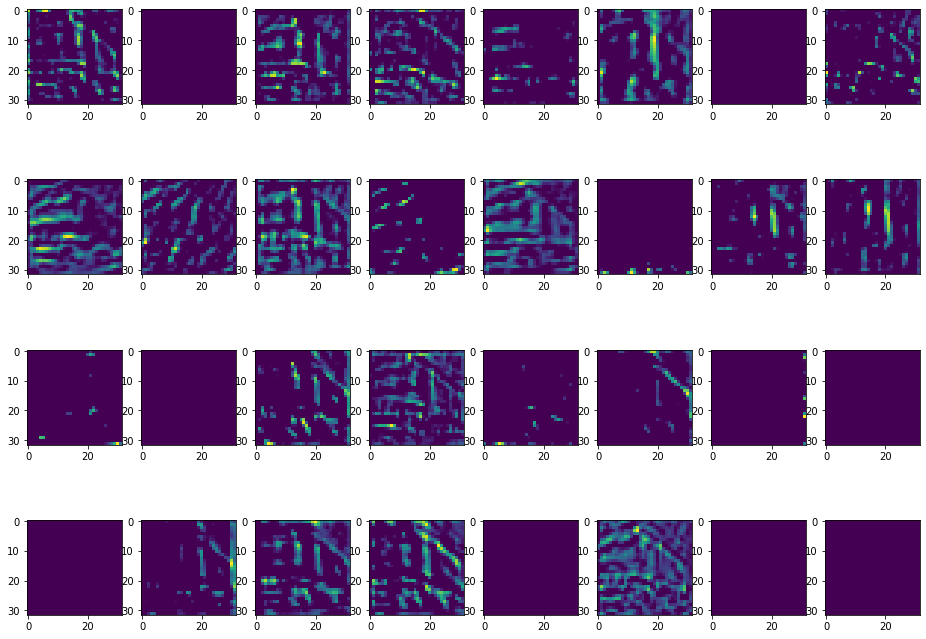

In [103]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_2[...,i]) * 255)
plt.show()

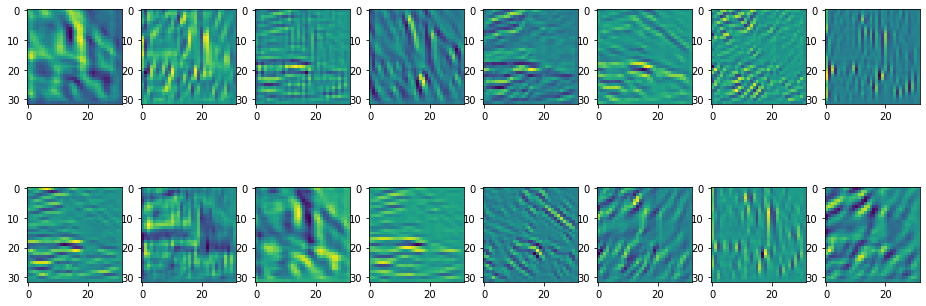

In [105]:
plt.figure(figsize = (8*2, 2*3))
for i in range(16):
    plt.subplot(2, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_1_3[...,i]) * 255)
plt.show()

# 上采样

结论: 上采样后把maxpool做的重点 进一步突出

In [128]:
layers = []
layers.append(keras.layers.Conv2D(32, 5, input_shape = [32, 32,3], padding="same", activation='relu'))
layers.append(keras.layers.MaxPooling2D(2))
layers.append(keras.layers.UpSampling2D(2))
layers.append(keras.layers.Flatten())
layers += mlp([300,20,10])

In [129]:
model3 = keras.models.Sequential(layers)
model3.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [130]:
%%time
model3.fit(x_train, y_train_cats, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 229s 146ms/step - loss: 1.6427 - accuracy: 0.4181
Epoch 2/5
1563/1563 [==============================] - 229s 147ms/step - loss: 1.3078 - accuracy: 0.5351
Epoch 3/5
1563/1563 [==============================] - 228s 146ms/step - loss: 1.1802 - accuracy: 0.5841
Epoch 4/5
1563/1563 [==============================] - 284s 182ms/step - loss: 1.0926 - accuracy: 0.6164
Epoch 5/5
1563/1563 [==============================] - 219s 140ms/step - loss: 1.0528 - accuracy: 0.6298
CPU times: user 39min 47s, sys: 12min 15s, total: 52min 3s
Wall time: 20min 18s


In [131]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32768)             131072    
_________________________________________________________________
dense_18 (Dense)             (None, 300)               9830700   
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)              

In [132]:
model_con1 = Model(inputs = model3.input, outputs = model3.get_layer('conv2d_17').output)
model_con2 = Model(inputs = model3.input, outputs = model3.get_layer('max_pooling2d_11').output)
model_con3 = Model(inputs = model3.input, outputs = model3.get_layer('up_sampling2d_9').output)
conv2d_1 = model_con1(np.expand_dims(x_train[1],0))
conv2d_2 = model_con2(np.expand_dims(x_train[1],0))
conv2d_3 = model_con3(np.expand_dims(x_train[1],0))

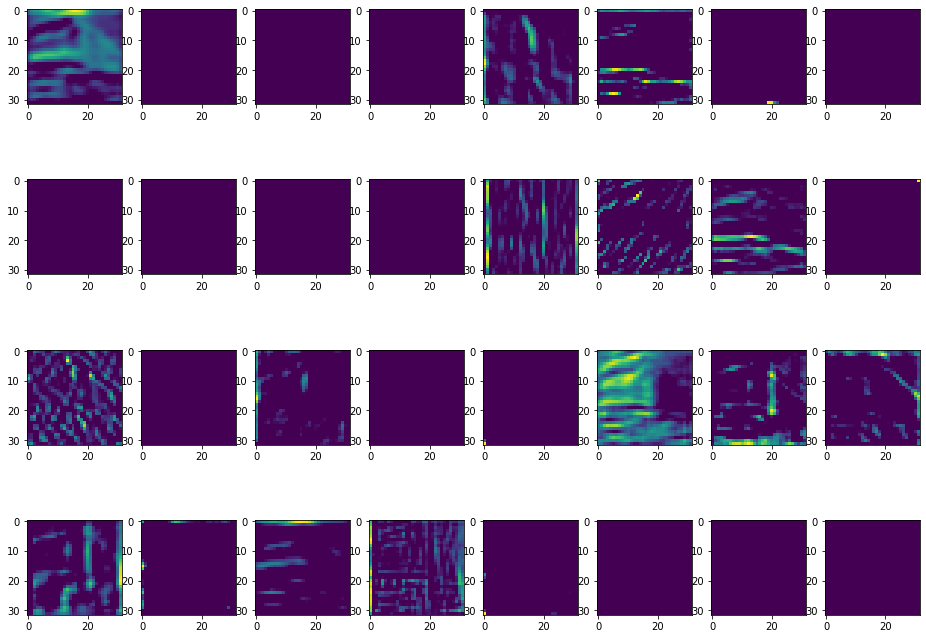

In [134]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_1[...,i]) * 255)
plt.show()

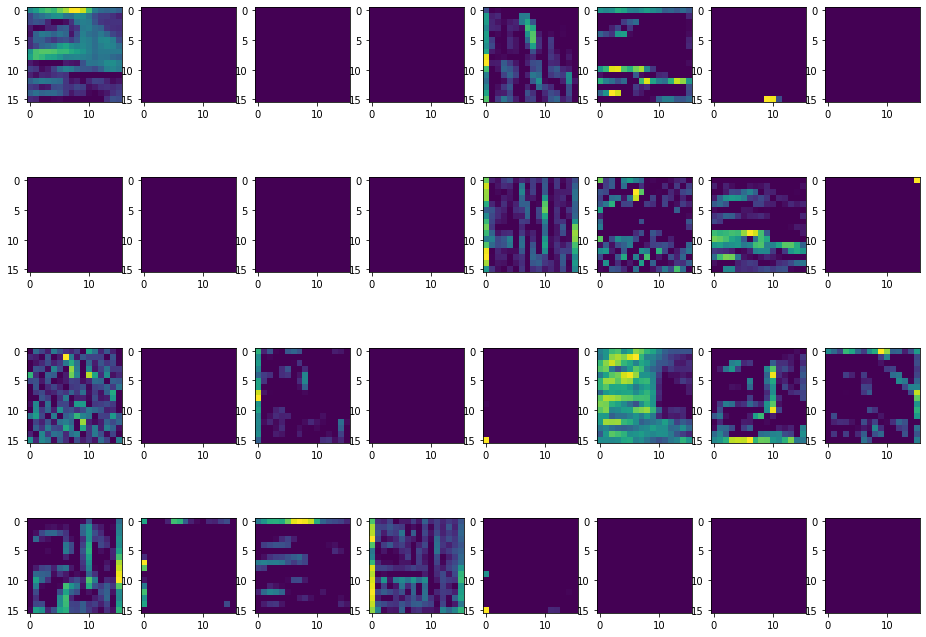

In [135]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_2[...,i]) * 255)
plt.show()

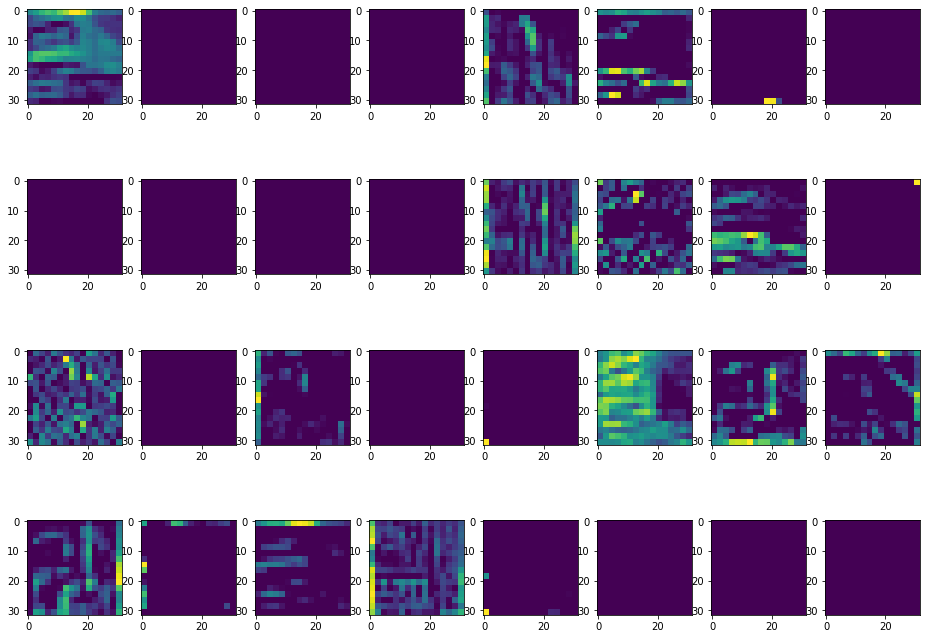

In [136]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_3[...,i]) * 255)
plt.show()

# ResNet 

## 使用cnn + maxpool + upsample + cnn + mlp

In [137]:
layers = []
layers.append(keras.layers.Conv2D(32, 5, input_shape = [32, 32,3], padding="same", activation='relu'))
layers.append(keras.layers.MaxPooling2D(2))
layers.append(keras.layers.UpSampling2D(2))
layers.append(keras.layers.Conv2D(16, 2, padding="same", activation='relu'))
layers.append(keras.layers.Flatten())
layers += mlp([300,20,10])

In [138]:
model4 = keras.models.Sequential(layers)
model4.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [139]:
%%time
model4.fit(x_train, y_train_cats, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 190s 122ms/step - loss: 1.6566 - accuracy: 0.4109
Epoch 2/5
1563/1563 [==============================] - 180s 115ms/step - loss: 1.2982 - accuracy: 0.5369
Epoch 3/5
1563/1563 [==============================] - 181s 116ms/step - loss: 1.1484 - accuracy: 0.5973
Epoch 4/5
1563/1563 [==============================] - 193s 123ms/step - loss: 1.0413 - accuracy: 0.6348
Epoch 5/5
1563/1563 [==============================] - 184s 118ms/step - loss: 0.9553 - accuracy: 0.6660
CPU times: user 30min 27s, sys: 10min 14s, total: 40min 42s
Wall time: 15min 50s


## Resnet

总结: Resnet 效果明显要好; 如果训练次数足够, feature map 应该是第一轮cnn训练出来feature map基础上,加重了关键点的描绘

In [143]:
inputs = keras.Input([32, 32,3])
x = keras.layers.Conv2D(32, 5, padding="same",input_shape = [32, 32,3], activation='relu')(inputs)
x2 = keras.layers.MaxPooling2D(2)(x)
x2 = keras.layers.UpSampling2D(2)(x2)
x2 = keras.layers.Conv2D(32, 2, padding="same", activation='relu')(x2)
x3 = keras.layers.Add()([x,x2])
x3 = keras.layers.Flatten()(x2)
x3 = keras.models.Sequential(mlp([300,20,10]))(x3)

model5 = keras.models.Model(inputs = inputs, outputs = x3)

In [144]:
model5.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
flatten_9 (Flatten)          (None, 32768)             0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 10)                996

In [145]:
model5.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [146]:
%%time
model5.fit(x_train, y_train_cats, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 284s 182ms/step - loss: 1.6233 - accuracy: 0.4269
Epoch 2/5
1563/1563 [==============================] - 259s 165ms/step - loss: 1.2478 - accuracy: 0.5608
Epoch 3/5
1563/1563 [==============================] - 259s 166ms/step - loss: 1.0932 - accuracy: 0.6160
Epoch 4/5
1563/1563 [==============================] - 261s 167ms/step - loss: 0.9844 - accuracy: 0.6568
Epoch 5/5
1563/1563 [==============================] - 276s 176ms/step - loss: 0.9029 - accuracy: 0.6831
CPU times: user 47min 38s, sys: 15min 50s, total: 1h 3min 29s
Wall time: 22min 43s


In [148]:
model_con1 = Model(inputs = model5.input, outputs = model5.get_layer('conv2d_24').output)
model_con2 = Model(inputs = model5.input, outputs = model5.get_layer('up_sampling2d_12').output)
model_con3 = Model(inputs = model5.input, outputs = model5.get_layer('conv2d_25').output)
conv2d_1 = model_con1(np.expand_dims(x_train[1],0))
conv2d_2 = model_con2(np.expand_dims(x_train[1],0))
conv2d_3 = model_con3(np.expand_dims(x_train[1],0))

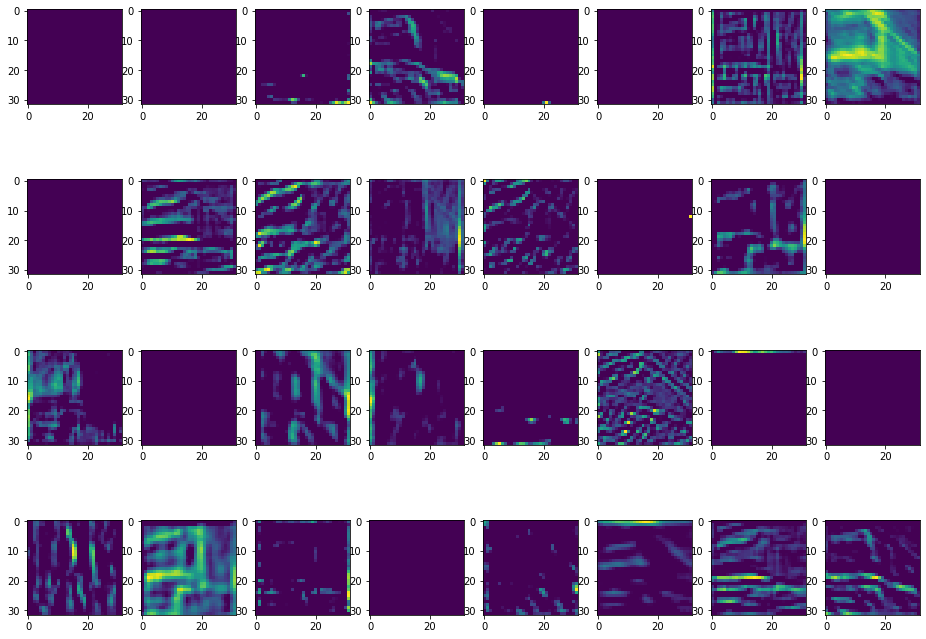

In [149]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_1[...,i]) * 255)
plt.show()

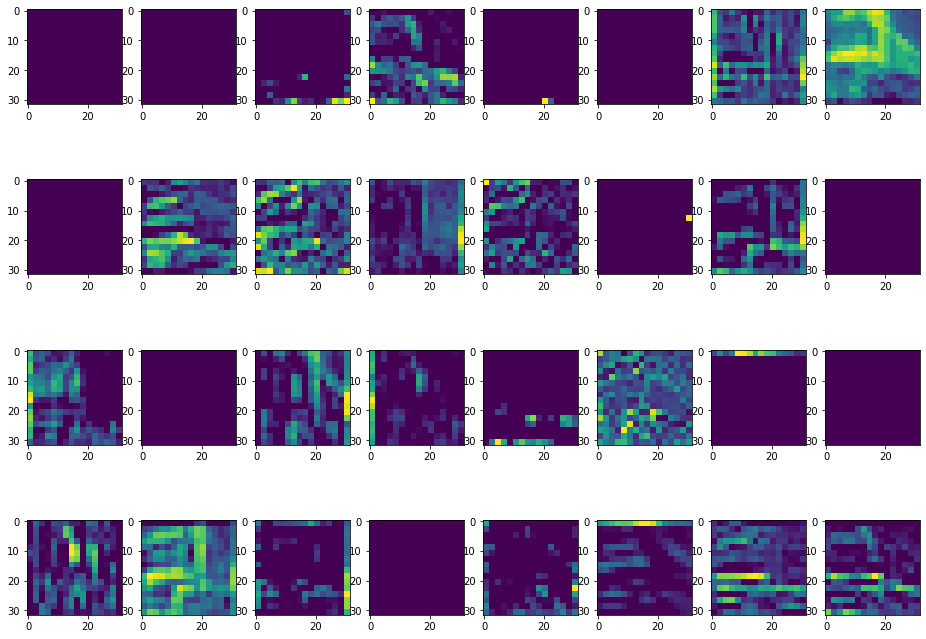

In [150]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_2[...,i]) * 255)
plt.show()

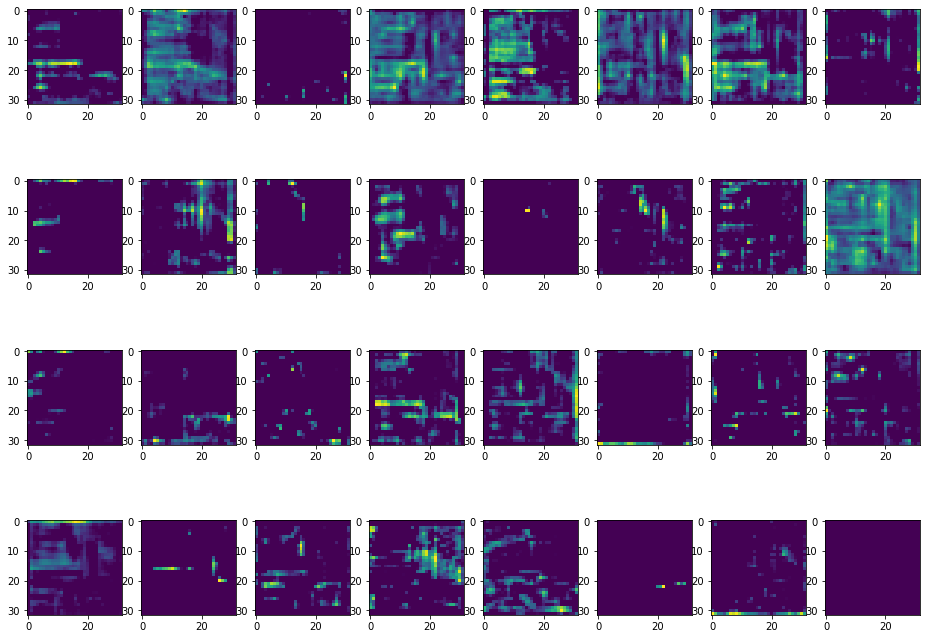

In [151]:
plt.figure(figsize = (8*2, 4*3))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(np.squeeze(conv2d_3[...,i]) * 255)
plt.show()

# Dense

In [8]:
inputs = keras.Input([32, 32,3])
x = keras.layers.Conv2D(2, 1, padding="same",input_shape = [32, 32,3], activation='relu')(inputs)
x = keras.layers.Conv2D(32, 5, padding="same",input_shape = [32, 32,3], activation='relu')(inputs)
x2 = keras.layers.MaxPooling2D(2)(x)
x2 = keras.layers.UpSampling2D(2)(x2)
x2 = keras.layers.Conv2D(32, 2, padding="same", activation='relu')(x2)
x3 = keras.layers.concatenate([x,x2])
x3 = keras.layers.Flatten()(x2)
x3 = keras.models.Sequential(mlp([300,20,10]))(x3)

model6 = keras.models.Model(inputs = inputs, outputs = x3)

In [14]:
model6.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
sequential (Sequential)      (None, 10)                996920

In [10]:
model6.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
%%time
model6.fit(x_train, y_train_cats, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 277s 177ms/step - loss: 1.6061 - accuracy: 0.4334
Epoch 2/10
1563/1563 [==============================] - 268s 171ms/step - loss: 1.2524 - accuracy: 0.5563
Epoch 3/10
1563/1563 [==============================] - 284s 182ms/step - loss: 1.0977 - accuracy: 0.6166
Epoch 4/10
1563/1563 [==============================] - 260s 166ms/step - loss: 0.9957 - accuracy: 0.6482
Epoch 5/10
1563/1563 [==============================] - 253s 162ms/step - loss: 0.9421 - accuracy: 0.6683
Epoch 6/10
1563/1563 [==============================] - 250s 160ms/step - loss: 0.8931 - accuracy: 0.6852
Epoch 7/10
1563/1563 [==============================] - 251s 161ms/step - loss: 0.8214 - accuracy: 0.7106
Epoch 8/10
1563/1563 [==============================] - 258s 165ms/step - loss: 0.7864 - accuracy: 0.7211
Epoch 9/10
1563/1563 [==============================] - 257s 164ms/step - loss: 0.7827 - accuracy: 0.7265
Epoch 10/10
1563/1563 [=======================